Mr Brightside has been in the UK charts for 185 weeks (or nearly 3.5 years) since its release in 2004. 

http://www.officialcharts.com/search/singles/mr-brightside/

** Why? **

To do: Check other songs
       Check other markets
       

In [6]:
%autosave 5
%matplotlib inline

import numpy as np
import pandas as pd
import requests
import bs4 as bs
import selenium.webdriver as webdriver
import re
import matplotlib.pylab as plt
import os
import datetime

Autosaving every 5 seconds


In [7]:
#Use selenium to open officialcharts.com
wd = webdriver.Chrome('/home/ga/anaconda2/webdriver/chromedriver')
wd.get('http://www.officialcharts.com/search/singles/mr-brightside/')

In [8]:
#Accept threat of cookies, scroll down screen
wd.find_element_by_class_name('acceptbtn').click()
wd.execute_script("window.scrollTo(0, 400);")

In [9]:
#Execute expanded page (test if successful), scroll down more.
wd.find_element_by_css_selector(".icon-circle-plus").click()
try:
    wd.find_element_by_css_selector('.selected')
except:
    print('Expanding window failed.')

In [10]:
#Pass instance of page source to variable, close connection
source = wd.page_source
# wd.close()

In [11]:
#Use BeautifulSoup to remove necessary data
soup = bs.BeautifulSoup(source)
print(soup.prettify())

/home/ga/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /home/ga/anaconda2/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


<!DOCTYPE html>
<!--[if lt IE 7]><html class="no-js ie6 oldie" lang="en"><![endif]-->
<!--[if IE 7]><html class="no-js ie7 oldie" lang="en"><![endif]-->
<!--[if IE 8]><html class="no-js ie8 oldie" lang="en"><![endif]-->
<!--[if gt IE 8]><!-->
<html class=" js no-touch" lang="en" style="" xmlns="http://www.w3.org/1999/xhtml">
 <!--<![endif]-->
 <head>
  <script async="" crossorigin="anonymous" src="https://fo-static.omnitagjs.com/ot_multi_template.js" type="text/javascript">
  </script>
  <script async="" src="http://b.scorecardresearch.com/beacon.js">
  </script>
  <script async="" src="http://www.google-analytics.com/ga.js" type="text/javascript">
  </script>
  <script src="http://pagead2.googlesyndication.com/pagead/osd.js">
  </script>
  <script src="https://securepubads.g.doubleclick.net/gpt/pubads_impl_rendering_20170926.js?cb=21061046">
  </script>
  <script src="https://securepubads.g.doubleclick.net/gampad/ads?gdfp_req=1&amp;correlator=1469979117332771&amp;output=json_html&amp;

In [12]:
results = soup.find_all('a', href=re.compile('^/charts/singles-chart/'))

In [13]:
data_dict = {}

for date in results:
    data_dict[date.attrs['data-date']] =  int(date.get_text())

In [14]:
df = pd.DataFrame(data_dict.items(), columns = ['date', 'rank'])
df.head()

date  rank
0  22.09.2012    82
1  11.08.2016    88
2  28.07.2012    95
3  18.10.2008    86
4  20.07.2017    45

In [15]:
df['date'] = pd.to_datetime(df['date'], format = '%d.%m.%Y')
df.sort_values(by = 'date', inplace = True)
df.head()

date  rank
137 2004-06-05    10
155 2004-06-12    26
96  2004-06-19    38
184 2004-06-26    60
5   2005-01-01   100

In [16]:
df.set_index('date', drop = True, inplace = True)
df.head()
df.to_csv(os.path.join(os.getcwd(), 'mr_brightside_rank.csv'))

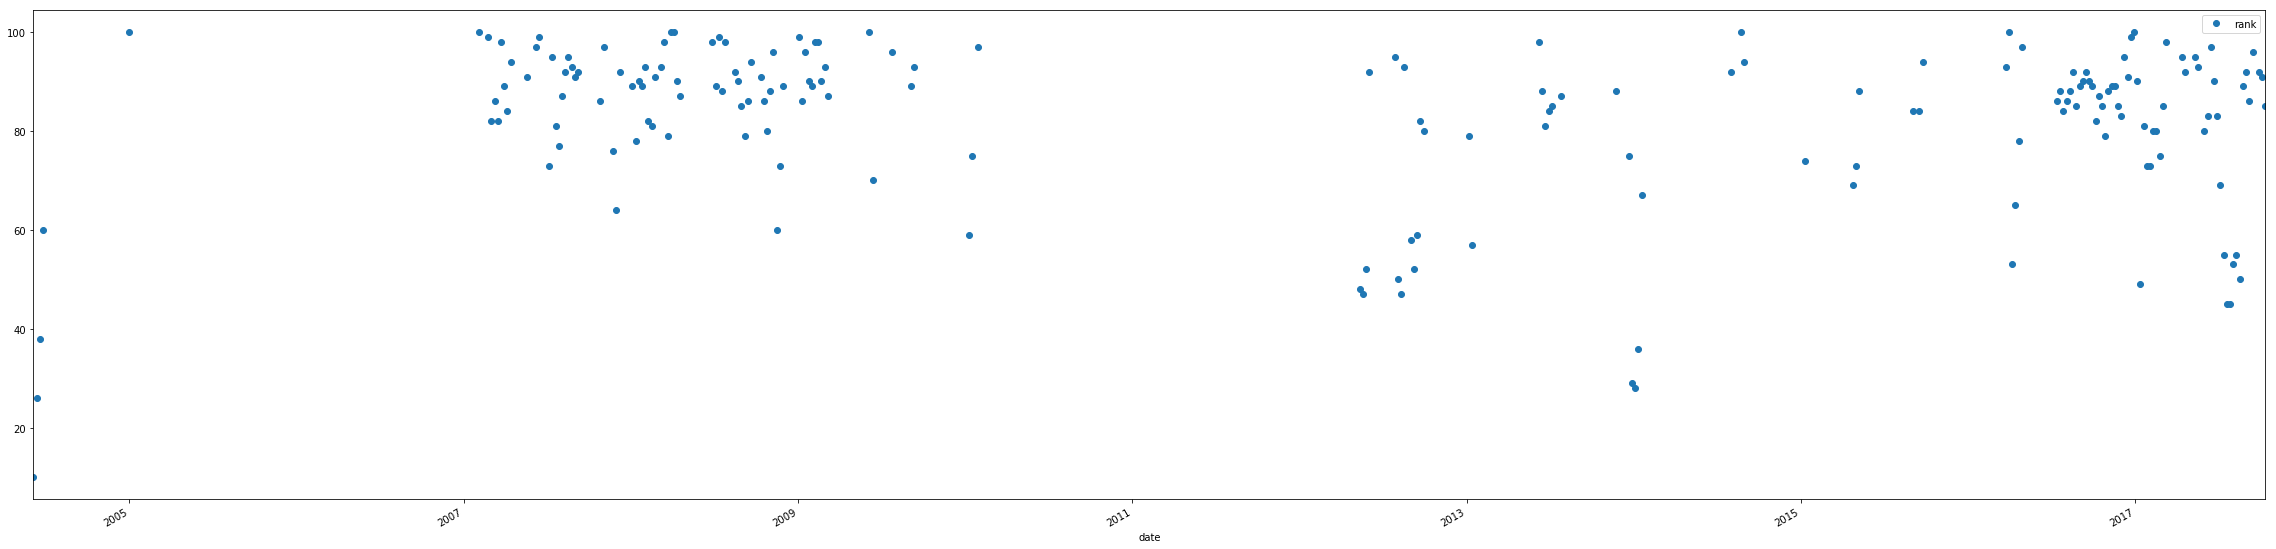

In [35]:
ax = df.plot(figsize=[40,10], style = 'o')

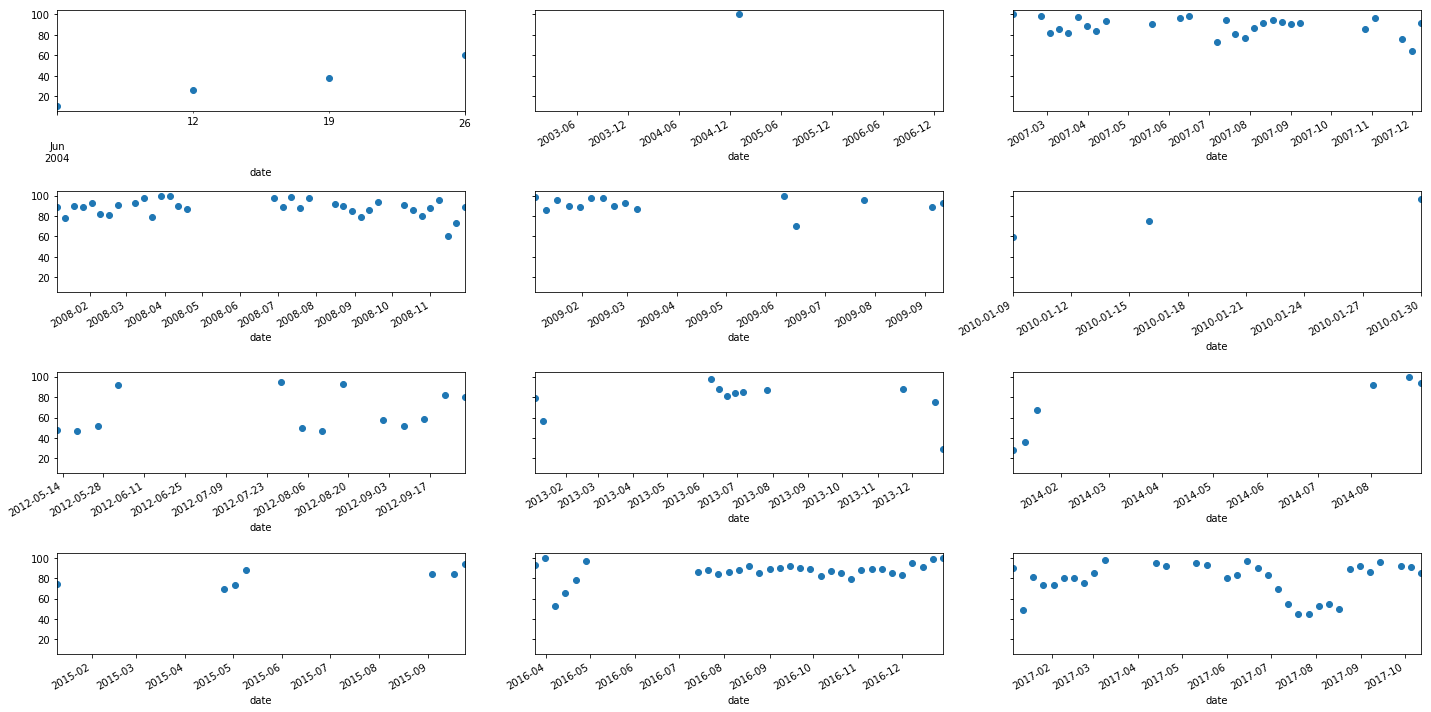

In [100]:
years = df.index.year.unique()
nyears = len(df.index.year.unique())

fig, ax = plt.subplots(4,3, figsize = [20,10], sharey=True);

for n, year in enumerate(years):
    df[df.index.year == year].plot(style = 'o', ax = fig.axes[n], legend = False)

plt.tight_layout()

1. In the UK charts, Mr. Brightside had moderate success on release (June 2004) with a max chart position of 10, slipping off the top 100 charts in December 2004.

2. From 2005 - late 2006 Mr Brightside remained off the charts.

3. In early 2007, Mr Brightside re-entered the top 100, where it remained until early 2010.

4. From 2010 to 2012 the song was off the charts until a second reimmergence in May 2012. 

5. Since, it has been in and out of the top 100 (a 6 month abscence in 2014 being the longest period above 100).

In [18]:
#Impact of new albums?

page = requests.get('https://en.wikipedia.org/wiki/The_Killers_discography').content
soup = bs.BeautifulSoup(page)

In [112]:
w_tables = soup.find_all('table', attrs = {'class' : 'wikitable plainrowheaders'}) #Get all tables on Killer's wiki
album_table = w_tables[0] #Album table
single_table = w_tables[4] #Singles table

raw_release = album_table.find_all('li', text = re.compile('Released'))
album_release = [name.text.replace('<li>', '').replace('</li>', '').replace('Released:', '') for name in raw_release]

In [21]:
albums = ["Hot Fuss", "Sam's Town", "Day & Age", "Battle Born", "Wonderful Wonderful"]
album_names = [s_table.find_all('a', text = album)[0].text for album in albums]

album_info = dict(zip(album_names, album_release))

In [23]:
album_df = pd.DataFrame(album_info.items(), columns = ['album', 'date'])
album_df['date'] = pd.to_datetime(album_df['date'])
album_df.sort_values(by=['date'], inplace = True)
album_df.head()
album_df.to_csv(os.path.join(os.getcwd(), 'killers_albums.csv'))

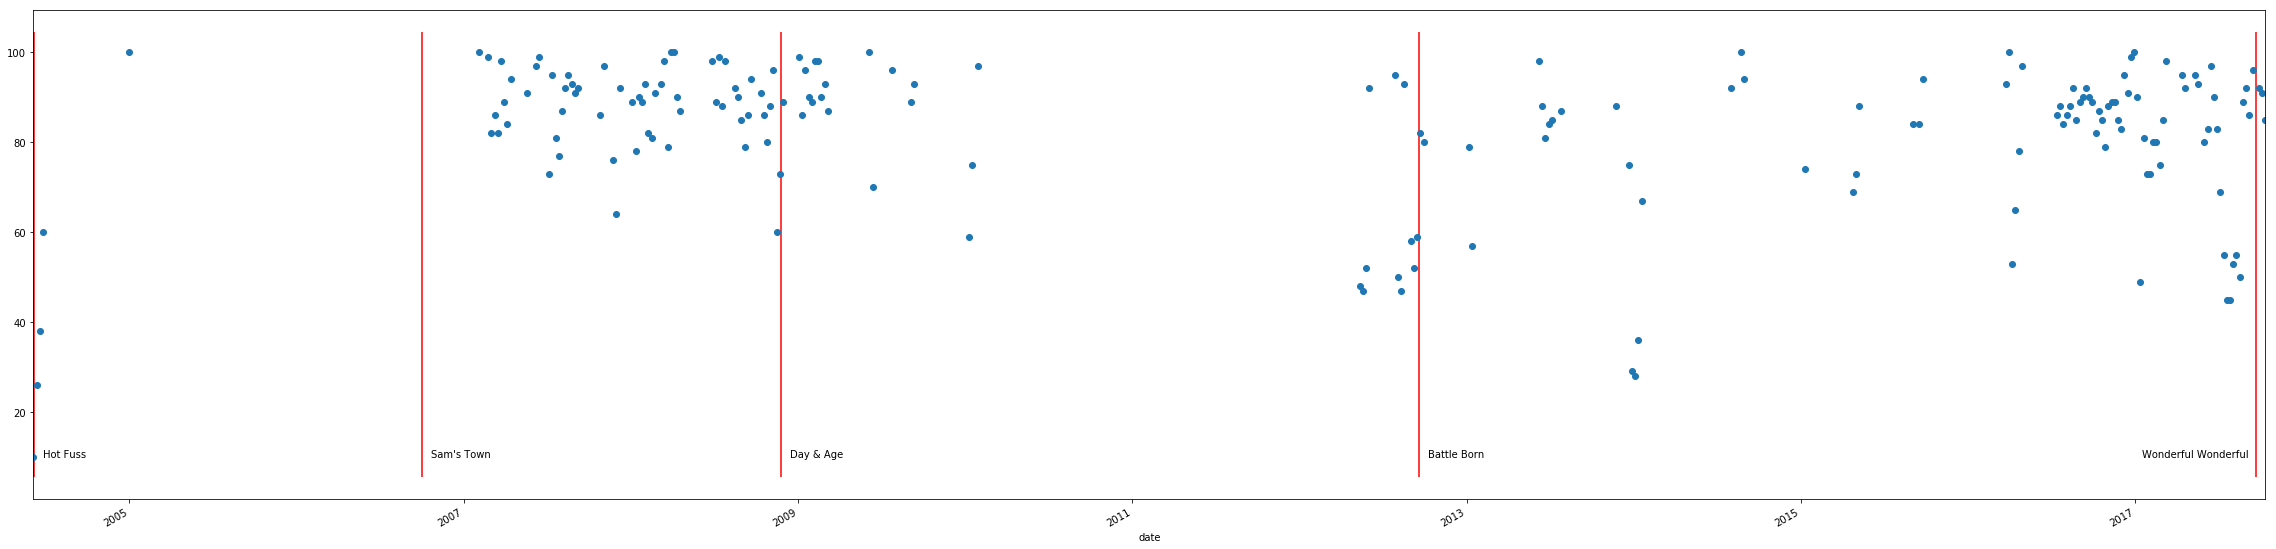

In [118]:
#Plot top 100 with release date of albums marked 

ax = df.plot(figsize=[40,10], style = 'o', legend = False)
ymin, ymax = plt.ylim()

for n, date in enumerate(album_df['date']):
    if n < len(album_df)-1:
        ax.vlines(x = date, ymin = ymin, ymax = ymax, color = 'r')
        ax.annotate(xy = [date + pd.Timedelta(20, unit = 'D'), 10], s = album_df['album'].iloc[n])
    else: 
        ax.vlines(x = date, ymin = ymin, ymax = ymax, color = 'r')
        ax.annotate(xy = [date + pd.Timedelta(-250, unit = 'D'), 10], s = album_df['album'].iloc[n])

In [137]:
th_rows = single_table.find_all('th', attrs = {'scope' : 'row'})
singles = [str(x.text.replace('\n','').replace(u'\xa1', '').replace('"', '')) for x in th_rows]

singles

['Mr. Brightside',
 'Somebody Told Me',
 "All These Things That I've Done",
 'Smile Like You Mean It',
 'When You Were Young',
 'Bones',
 'A Great Big Sled(featuring Toni Halliday)',
 'Read My Mind',
 'For Reasons Unknown',
 'Shadowplay',
 'Tranquilize(featuring Lou Reed)',
 "Don't Shoot Me Santa",
 'Human',
 'Spaceman',
 'Joseph, Better You than Me(featuring Elton John and Neil Tennant)',
 'The World We Live In',
 'A Dustland Fairytale',
 'Happy Birthday Guadalupe!(featuring Wild Light and Mariachi El Bronx)',
 'Boots',
 "The Cowboys' Christmas Ball",
 'Runaways',
 'Miss Atomic Bomb',
 'I Feel It in My Bones',
 'Here with Me',
 'Shot at the Night',
 'Just Another Girl',
 'Christmas in L.A.(featuring Dawes)',
 'Joel the Lump of Coal(featuring Jimmy Kimmel)',
 'Dirt Sledding(featuring Ryan Pardey and Richard Dreyfuss)',
 'Peace of Mind[59]',
 'The Man']